Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd 
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS



In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#printing stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [4]:
#loading the dataset to a pandas dataframe
news_dataset=pd.read_csv('train.csv')

In [5]:
news_dataset.shape

(20800, 5)

In [6]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
#counting number of missing values from dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
#replacing the null values with empty string
news_dataset = news_dataset.fillna('')

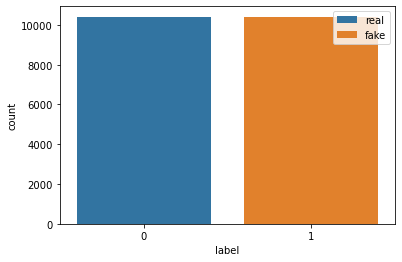

In [14]:
#Checking if the data is balanced or imbalanced
ax =sns.countplot(x="label",hue = "label", dodge=False, data=news_dataset);
ax.legend(labels = ['real', 'fake'])

In [15]:
#merging the author name and new title
news_dataset['content'] = news_dataset['author'] + ' ' + news_dataset['title']

In [16]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [17]:
#seprating the data label

X = news_dataset.drop(columns='label',axis=1)
Y = news_dataset['label']

In [18]:
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [19]:
print(Y)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


Streming :

    

In [20]:
port_stem =PorterStemmer()

In [21]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [22]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [23]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [24]:
df =news_dataset

In [25]:
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aid even see comey letter...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillari clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnew com truth might get fire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss civilian kill singl us airstri...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...


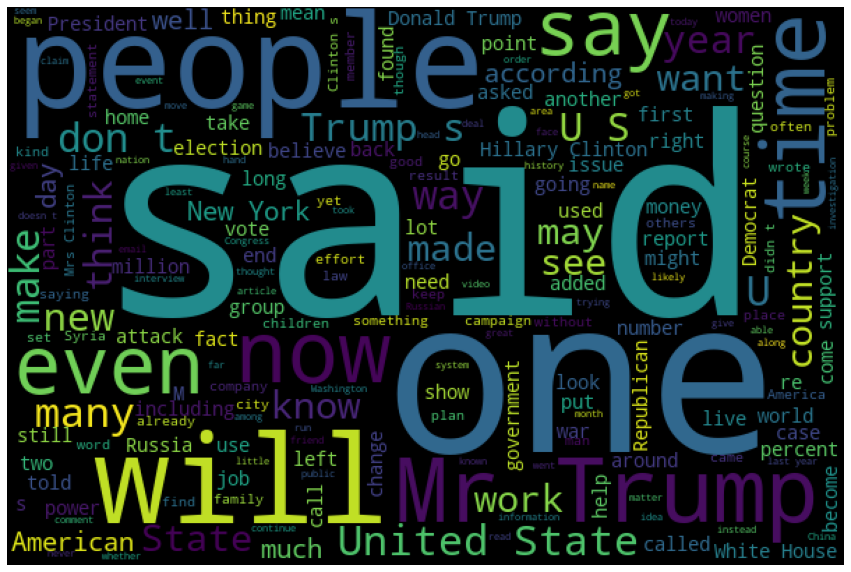

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=600, height=400)
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(df['text']))
# plotting the word cloud
plt.figure(figsize=(15,15))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

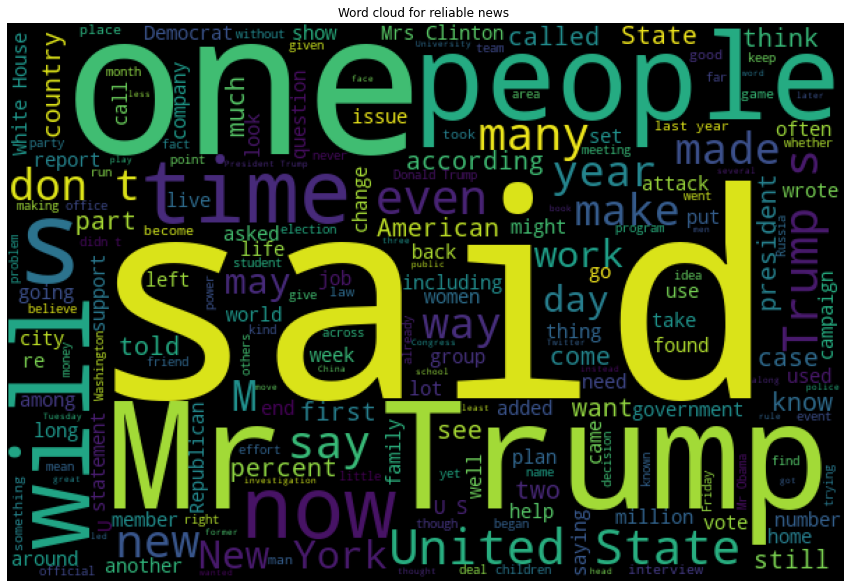

In [28]:
# Word cloud for reliable news only:
true_n = ' '.join(df[df['label']==0]['text']) 
wc = wordcloud.generate(true_n)
plt.figure(figsize=(15,15))
plt.title("Word cloud for reliable news ")
plt.imshow(wc)
plt.axis('off')
plt.show()

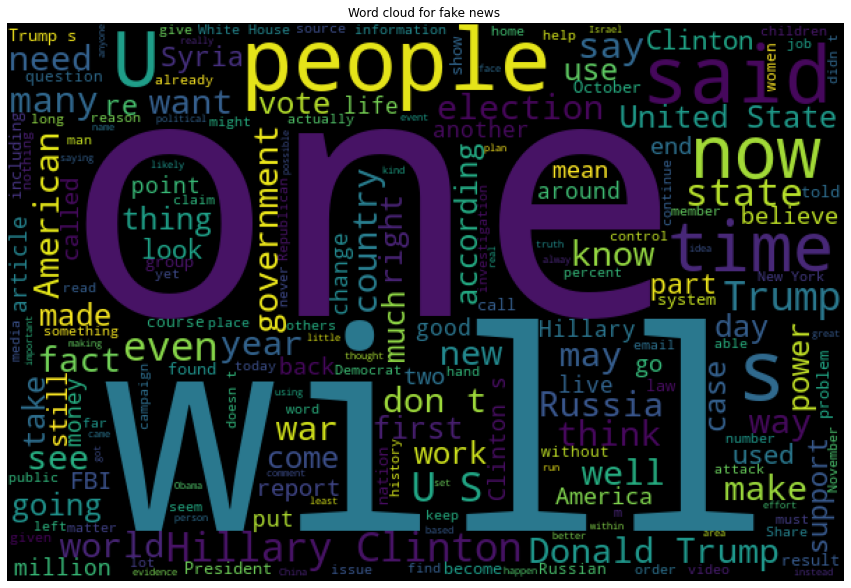

In [29]:
# Word cloud for fake news only:
fake_n = ' '.join(df[df['label']==1]['text'])
wc= wordcloud.generate(fake_n)
plt.figure(figsize=(15,15))
plt.title("Word cloud for fake news ")
plt.imshow(wc)
plt.axis('off')
plt.show()

In [30]:
# seprating the data and label
X= news_dataset['content'].values
Y = news_dataset['label'].values

In [31]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [32]:
print(Y)
Y.shape

[1 0 1 ... 0 1 1]


(20800,)

In [33]:
# Converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [34]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [35]:
#Splitting dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [37]:
# importing metrics
from sklearn.metrics import classification_report

# Logistic regression

In [38]:
logicReg = LogisticRegression()
logicReg.fit(X_train,Y_train)

LogisticRegression()

In [39]:
#evaluation
#accuracy score on training data
X_train_prediction = logicReg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)


In [40]:
print(classification_report(X_train_prediction,Y_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8185
           1       0.99      0.98      0.99      8455

    accuracy                           0.99     16640
   macro avg       0.99      0.99      0.99     16640
weighted avg       0.99      0.99      0.99     16640



In [41]:
print('Accuracy score of training data : ',training_data_accuracy)

Accuracy score of training data :  0.9865985576923076


In [42]:
#

X_test_prediction = logicReg.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy score of testing data : ',test_data_accuracy)

Accuracy score of testing data :  0.9790865384615385


In [91]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2018
           1       0.99      0.97      0.98      2142

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



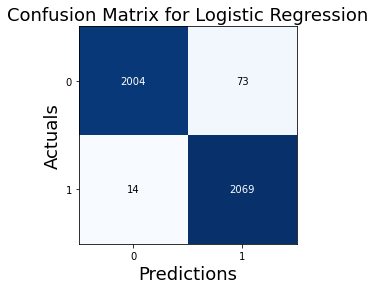

In [45]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm3 = confusion_matrix(Y_test, X_test_prediction, labels=[0,1])
plot_confusion_matrix(cm3)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for Logistic Regression', fontsize=18)
plt.show()

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
RF_pipeline = RandomForestClassifier()

In [48]:
RF_pipeline.fit(X_train,Y_train)


RandomForestClassifier()

In [50]:
RF_predictions = RF_pipeline.predict(X_test)


In [51]:
print(classification_report(RF_predictions,Y_test))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2066
           1       1.00      0.99      0.99      2094

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [52]:
accuracy_score(Y_test, RF_predictions)


0.9935096153846154

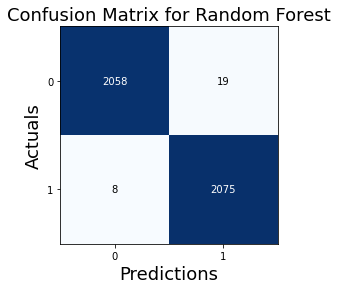

In [54]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
rm_cm = confusion_matrix(Y_test, RF_predictions, labels=[0,1])
plot_confusion_matrix(rm_cm)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for Random Forest', fontsize=18)
plt.show()

# SVM

In [55]:
from sklearn.svm import SVC

In [56]:
SVC_pipeline =SVC()

In [57]:
SVC_pipeline.fit(X_train,Y_train)

SVC()

In [58]:
SVC_predictions = SVC_pipeline.predict(X_test)
print(classification_report(SVC_predictions,Y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2055
           1       0.99      0.98      0.99      2105

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [59]:
accuracy_score(Y_test, SVC_predictions)

0.9889423076923077

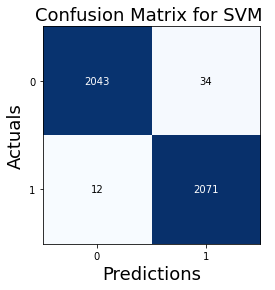

In [60]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
svm_cm = confusion_matrix(Y_test, SVC_predictions, labels=[0,1])
plot_confusion_matrix(svm_cm)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for SVM ', fontsize=18)
plt.show()

# Navies Baised

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [62]:
# Naive Bayes classifier pipeline
NB_pipeline =  MultinomialNB() # train on TF-IDF vectors w/ Naive Bayes classifier
NB_pipeline.fit(X_train, Y_train)

MultinomialNB()

In [63]:
# we make predictions from NB classifier
NB_predictions = NB_pipeline.predict(X_test)

In [64]:
# printing classification report
print(classification_report(NB_predictions,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      2238
           1       0.92      0.99      0.95      1922

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.95      4160
weighted avg       0.96      0.96      0.96      4160



In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, NB_predictions)

0.9550480769230769

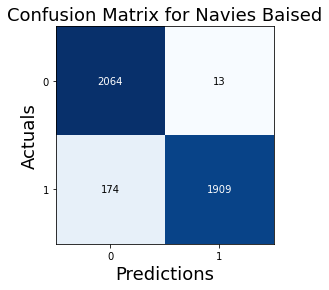

In [66]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
nb_cm = confusion_matrix(Y_test, NB_predictions, labels=[0,1])
plot_confusion_matrix(nb_cm)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for Navies Baised', fontsize=18)
plt.show()

# KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier


In [68]:
KNN_pipeline = KNeighborsClassifier()
KNN_pipeline.fit(X_train,Y_train)

KNeighborsClassifier()

In [70]:
KNN_predictions = KNN_pipeline.predict(X_test)

In [71]:
print(classification_report(KNN_predictions,Y_test))

              precision    recall  f1-score   support

           0       0.05      1.00      0.09        94
           1       1.00      0.51      0.68      4066

    accuracy                           0.52      4160
   macro avg       0.52      0.76      0.38      4160
weighted avg       0.98      0.52      0.66      4160



In [72]:
accuracy_score(Y_test, KNN_predictions)

0.5233173076923077

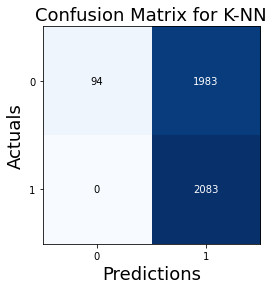

In [74]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
knn_cm = confusion_matrix(Y_test, KNN_predictions, labels=[0,1])
plot_confusion_matrix(knn_cm)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for K-NN', fontsize=18)
plt.show()

Making Predicitve System

In [41]:
X_new=X_test[1]

prediction = model.predict(X_new)
print(prediction)

if (prediction==0):
    print('The news is real')
else :
    print('The news is fake')

[0]
The news is real


In [42]:
print(Y_test[1])

0


<Figure size 360x360 with 0 Axes>

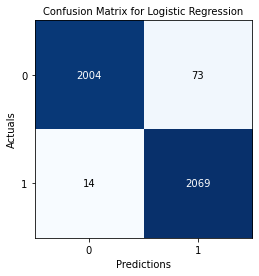

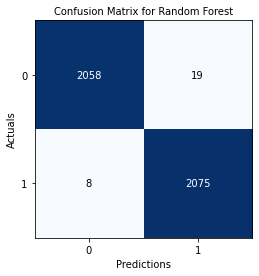

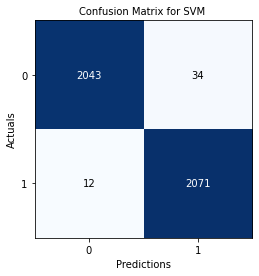

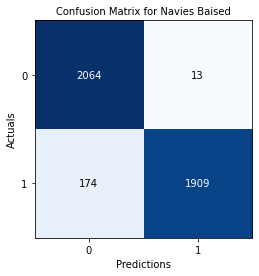

In [90]:
plt.figure(figsize=(5,5))
#plt.subplot(2,2,1)
cm3 = confusion_matrix(Y_test, X_test_prediction)
plot_confusion_matrix(cm3)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix for Logistic Regression', fontsize=10)
plt.show()

#plt.subplot(2,2,2)
rm_cm = confusion_matrix(Y_test, RF_predictions, labels=[0,1])
plot_confusion_matrix(rm_cm)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix for Random Forest', fontsize=10)
plt.show()

#plt.subplot(2,2,3)
svm_cm = confusion_matrix(Y_test, SVC_predictions, labels=[0,1])
plot_confusion_matrix(svm_cm)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix for SVM ', fontsize=10)
plt.show()

#plt.subplot(2,2,4)
nb_cm = confusion_matrix(Y_test, NB_predictions, labels=[0,1])
plot_confusion_matrix(nb_cm)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix for Navies Baised', fontsize=10)
plt.show()